In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


df= pd.read_csv("/content/drive/MyDrive/universal_top_spotify_songs.csv")
df.shape

(36523, 25)

In [ ]:
# Filter rows based on values in the 'country' column
selected_countries = ['US', 'CA', 'IN', 'MX','AU','NZ','GB']
spotify_song_data = df[df['country'].isin(selected_countries)]
spotify_song_data.head()

song_data=spotify_song_data.copy()
song_data.head(3)

song_data.shape

(3511, 25)

In [ ]:
song_data.columns[song_data.isnull().any()]

song_data.isnull().sum()

spotify_id            0
name                  0
artists               0
daily_rank            0
daily_movement        0
weekly_movement       0
country               0
snapshot_date         0
popularity            0
is_explicit           0
duration_ms           0
album_name            0
album_release_date    0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
dtype: int64

In [ ]:
df_cleaned = song_data.dropna()
df_cleaned.head()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
260,2YSzYUF3jWqb9YP9VXmpjE,IDGAF (feat. Yeat),"Drake, Yeat",1,0,0,US,2023-10-27,93,True,...,8,-8.399,1,0.2710,0.0464,0.000089,0.205,0.138,136.952,4
261,4MjDJD8cW7iVeWInc2Bdyj,MONACO,Bad Bunny,2,1,0,US,2023-10-27,96,True,...,4,-5.009,0,0.0680,0.1500,0.000402,0.580,0.130,139.056,4
262,3vkCueOmm7xQDoJ17W1Pm3,My Love Mine All Mine,Mitski,3,-1,0,US,2023-10-27,96,False,...,9,-14.958,1,0.0321,0.8680,0.135000,0.158,0.121,113.950,4
263,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,Taylor Swift,4,0,3,US,2023-10-27,100,False,...,9,-5.707,1,0.1570,0.1170,0.000021,0.105,0.564,169.994,4
264,4KULAymBBJcPRpk1yO4dOG,I Remember Everything (feat. Kacey Musgraves),"Zach Bryan, Kacey Musgraves",5,1,-1,US,2023-10-27,94,False,...,0,-7.746,1,0.0459,0.5540,0.000002,0.102,0.155,77.639,4


In [ ]:
song_data.duration_ms= song_data.duration_ms.astype(float)
song_data.time_signature= song_data.time_signature.astype(float)
song_data['mode'] = song_data['mode'].astype(float)

song_data.describe()

,daily_rank,daily_movement,weekly_movement,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,3511.000000,3511.000000,3511.000000,3511.000000,3511.000000,3511.000000,3511.000000,3511.000000,3511.000000,3511.000000,3511.000000,3511.000000,3511.000000,3511.000000,3511.000000,3511.000000,3511.000000
mean,25.563087,2.617203,15.033039,86.853318,204860.281971,0.660576,0.645391,5.407007,-6.616087,0.592139,0.092517,0.273589,0.009488,0.173923,0.522387,122.188554,3.848191
std,14.465124,9.342875,16.758110,9.219042,46206.542275,0.136722,0.164868,3.619565,2.657221,0.491507,0.082719,0.255133,0.049815,0.121299,0.238761,28.868078,0.462893
min,1.000000,-36.000000,-26.000000,0.000000,103264.000000,0.271000,0.091100,0.000000,-17.665000,0.000000,0.025000,0.000008,0.000000,0.023200,0.066700,65.203000,1.000000
25%,13.000000,0.000000,0.000000,83.000000,173104.000000,0.557000,0.540000,2.000000,-7.779000,0.000000,0.038900,0.068400,0.000000,0.101000,0.356000,97.994000,4.000000
50%,26.000000,0.000000,10.000000,88.000000,201084.000000,0.662000,0.670000,5.000000,-6.169000,1.000000,0.057800,0.183000,0.000002,0.125000,0.519000,119.935000,4.000000
75%,38.000000,2.000000,29.000000,93.000000,231000.000000,0.761000,0.744000,9.000000,-5.176000,1.000000,0.101000,0.440000,0.000177,0.205000,0.744000,140.098000,4.000000
max,50.000000,49.000000,49.000000,100.000000,586075.000000,0.974000,0.978000,11.000000,-0.210000,1.000000,0.491000,0.969000,0.652000,0.890000,0.967000,203.759000,4.000000


In [ ]:
# Specify the column for which you want to calculate the mean
column_name = 'popularity'
song_data.shape
# Check if the specified column exists in the DataFrame
if column_name in df.columns:
    # Calculate the mean of the specified column
    mean_value = df[column_name].mean()

    # Print the result
    print(f"The mean of the '{column_name}' column is: {mean_value}")
else:
    print(f"Column '{column_name}' not found in the dataset.")

The mean of the 'popularity' column is: 78.56621854721682


In [ ]:
song_data["s_popularity"]= [ 1 if i>=78.56 else 0 for i in song_data.popularity ]
song_data["s_popularity"].value_counts()

1    3101
0     410
Name: s_popularity, dtype: int64

In [ ]:
a=song_data[song_data["s_popularity"]==1]
a.describe()
a.shape

(3101, 26)

In [ ]:
song_data.drop(["spotify_id","artists","country","snapshot_date","is_explicit","album_name","album_release_date","popularity","name"],axis=1,inplace=True)
song_data.columns[song_data.isnull().any()]
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36523 entries, 0 to 36522
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   spotify_id          36523 non-null  object 
 1   name                36522 non-null  object 
 2   artists             36522 non-null  object 
 3   daily_rank          36523 non-null  int64  
 4   daily_movement      36523 non-null  int64  
 5   weekly_movement     36523 non-null  int64  
 6   country             36021 non-null  object 
 7   snapshot_date       36523 non-null  object 
 8   popularity          36523 non-null  int64  
 9   is_explicit         36523 non-null  bool   
 10  duration_ms         36523 non-null  int64  
 11  album_name          36522 non-null  object 
 12  album_release_date  36522 non-null  object 
 13  danceability        36523 non-null  float64
 14  energy              36523 non-null  float64
 15  key                 36523 non-null  int64  
 16  loud

In [ ]:
#data preparation
y = song_data["s_popularity"].values
x_data=song_data.drop(["s_popularity"],axis=1)
#normalization
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)
x_train = x_train.T
x_test = x_test.T
y_train = y_train.astype(int).T
y_test = y_test.astype(int).T
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (16, 2808)
x_test:  (16, 703)
y_train:  (2808,)
y_test:  (703,)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


Cost after iteration 0: 0.666704
Cost after iteration 10: 0.608254
Cost after iteration 20: 0.562639
Cost after iteration 30: 0.526826
Cost after iteration 40: 0.498500
Cost after iteration 50: 0.475910
Cost after iteration 60: 0.457746
Cost after iteration 70: 0.443021
Cost after iteration 80: 0.430991
Cost after iteration 90: 0.421091
Cost after iteration 100: 0.412888
Cost after iteration 110: 0.406048
Cost after iteration 120: 0.400311
Cost after iteration 130: 0.395473
Cost after iteration 140: 0.391374
Cost after iteration 150: 0.387883
Cost after iteration 160: 0.384899
Cost after iteration 170: 0.382337
Cost after iteration 180: 0.380129
Cost after iteration 190: 0.378220


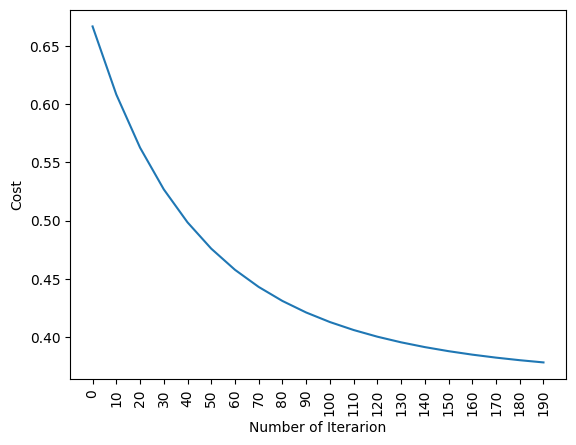

train accuracy: 88.24786324786325 %
test accuracy: 88.62019914651493 %


In [ ]:
# parameter initialize and sigmoid function
def initialize_weights_and_bias(dimension):
    w=np.full((dimension,1),0.01)
    b=0.0
    return w,b

def sigmoid(z):
    y_head = 1/(1+ np.exp(-z))
    return y_head


def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []

    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))

    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

def predict(w,b,x_test):
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction



def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)
    #update
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

logistic_regression(x_train, y_train, x_test, y_test,learning_rate =0.01, num_iterations = 200)


In [ ]:
x,y = song_data.loc[:,song_data.columns != 's_popularity'], song_data.loc[:,'s_popularity']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
y=y.astype(int)
y_train= y_train.astype(int)
y_test= y_test.astype(int)


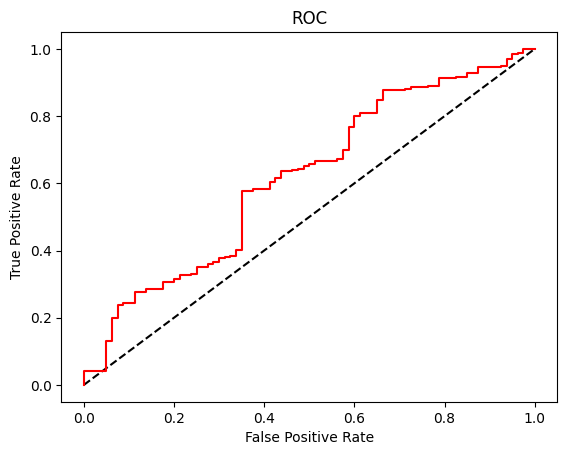

In [ ]:
# ROC Curve with logistic regression
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr,color="red")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
k = 10
cv_result = cross_val_score(logreg,x_train,y_train,cv=k)
cross_val_log=np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.88256228 0.88256228 0.88256228 0.88256228 0.88256228 0.88256228
 0.88256228 0.88256228 0.88214286 0.88214286]
Cross_val scores average:  0.8824783934926284


In [ ]:
#GridSearchCV with Logreg
from sklearn.model_selection import GridSearchCV
param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,param_grid,cv=3)
logreg_cv.fit(x_train,y_train)
print("Tuned hyperparameters : {}".format(logreg_cv.best_params_))
print("Best Accuracy: {}".format(logreg_cv.best_score_))
##numpy.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None, axis=0)


Tuned hyperparameters : {'C': 0.001, 'penalty': 'l2'}
Best Accuracy: 0.8824786324786325


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
21 fits failed out of a total of 42.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

In [ ]:

Logistic_score=logreg_cv.best_score_
CrossVal_Logistic_score=cross_val_log

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(x_train,y_train)
print("Train accuracy of naive bayes:",nb.score(x_train,y_train))
print("Test accuracy of naive bayes:",nb.score(x_test,y_test))

Train accuracy of naive bayes: 0.8782051282051282
Test accuracy of naive bayes: 0.8847795163584637


In [ ]:
Naive_bayes_score=nb.score(x_test,y_test)

In [ ]:
#randomforest

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state = 42)
rf.fit(x_train,y_train)
print("Train accuracy of random forest",rf.score(x_train,y_train))
print("Test accuracy of random forest",rf.score(x_test,y_test))
RandomForestClassifier_score=rf.score(x_test,y_test)
y_pred=rf.predict(x_test)
t_true=y_test

Train accuracy of random forest 1.0
Test accuracy of random forest 0.9857752489331437


In [ ]:
from sklearn.model_selection import cross_val_score
k = 10
cv_result = cross_val_score(rf,x_train,y_train,cv=k) # uses R^2 as score
cv_result_randomforest=np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.98576512 0.99288256 0.97864769 0.98220641 0.97864769 0.97864769
 0.99288256 0.98576512 0.99285714 0.99285714]
Cross_val scores average:  0.9861159125571938


In [ ]:
CrossVal_RandomForestClassifier_score=cv_result_randomforest

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))

Confusion matrix: 
 [[ 75   5]
 [  5 618]]
Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        80
           1       0.99      0.99      0.99       623

    accuracy                           0.99       703
   macro avg       0.96      0.96      0.96       703
weighted avg       0.99      0.99      0.99       703



In [ ]:
#View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred)

array([[ 75,   5],
       [  5, 618]])

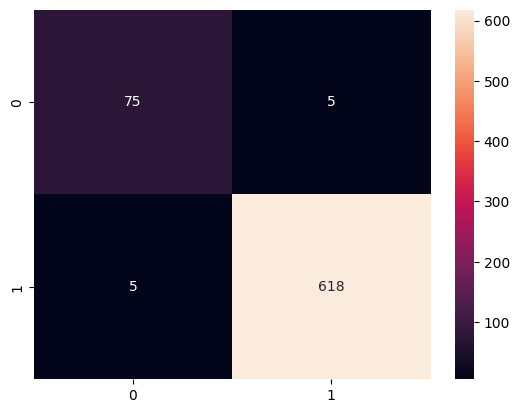

In [ ]:
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [ ]:
#Voting Classifier
from sklearn.ensemble import VotingClassifier
ensemble=VotingClassifier(estimators=[('Random Forest', rf), ('Logistic Regression', logreg)],
                       voting='soft', weights=[2,1]).fit(x_train,y_train)
print('The train accuracy for Random Forest and Logistic Regression is:',ensemble.score(x_train,y_train))
print('The test accuracy for Random Forest and Logistic Regression is:',ensemble.score(x_test,y_test))

The train accuracy for Random Forest and Logistic Regression is: 0.9978632478632479
The test accuracy for Random Forest and Logistic Regression is: 0.9829302987197724


In [ ]:
from sklearn.model_selection import cross_val_score
k = 5
cv_result = cross_val_score(ensemble,x_train,y_train,cv=k) # uses R^2 as score
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.98220641 0.97330961 0.96263345 0.97682709 0.97860963]
Cross_val scores average:  0.9747172372669546


In [ ]:
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot

# fit model no training data
model = XGBClassifier()
model.fit(x_train, y_train)
# feature importance
print(model.feature_importances_)
# plot
#pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
#pyplot.show()

[0.01705624 0.0096366  0.01675518 0.11498205 0.09042379 0.0685778
 0.07290716 0.05946042 0.01983578 0.0441293  0.08195543 0.06807721
 0.06030485 0.10010051 0.08476865 0.09102901]


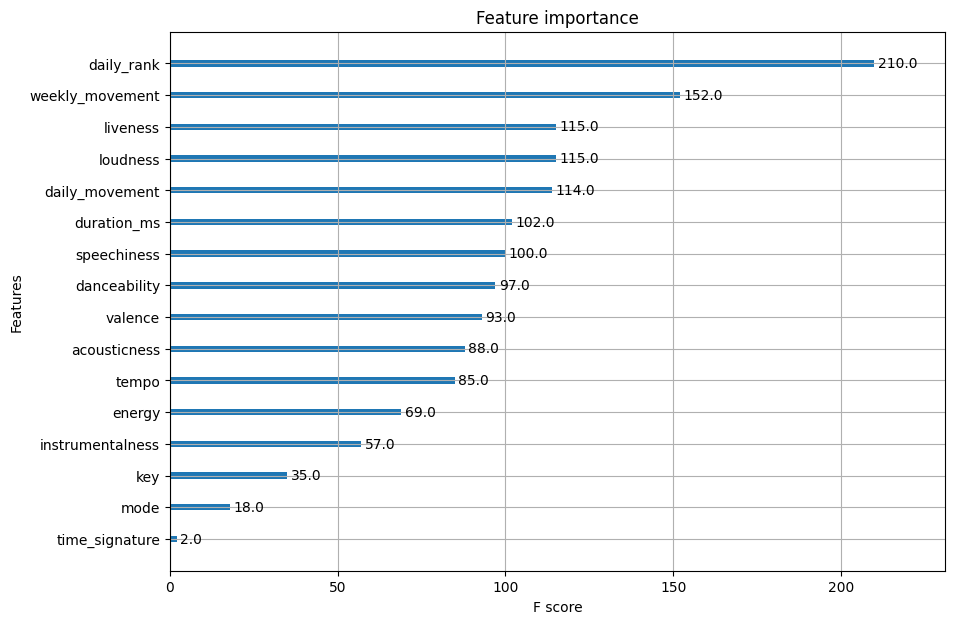

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

model = XGBClassifier()
model.fit(x_train, y_train)

# plot feature importance
ax = plot_importance(model)
fig = ax.figure
fig.set_size_inches(10, 7)
#plot_importance(model)
pyplot.show()

In [ ]:
from numpy import sort
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

thresholds = sort(model.feature_importances_) # Fit model using each importance as a threshold

for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True) # if prefit=True, you should call transform directly.
    select_X_train = selection.transform(x_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # evaluate model
    select_X_test = selection.transform(x_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 98.58%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.010, n=16, Accuracy: 98.58%
Thresh=0.017, n=15, Accuracy: 98.58%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.017, n=14, Accuracy: 98.29%
Thresh=0.020, n=13, Accuracy: 97.87%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.044, n=12, Accuracy: 97.87%
Thresh=0.059, n=11, Accuracy: 97.87%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.060, n=10, Accuracy: 97.87%
Thresh=0.068, n=9, Accuracy: 97.87%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.069, n=8, Accuracy: 97.87%
Thresh=0.073, n=7, Accuracy: 97.87%
Thresh=0.082, n=6, Accuracy: 98.01%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.085, n=5, Accuracy: 97.87%
Thresh=0.090, n=4, Accuracy: 97.87%
Thresh=0.091, n=3, Accuracy: 97.58%
Thresh=0.100, n=2, Accuracy: 97.58%
Thresh=0.115, n=1, Accuracy: 97.30%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
model_performances=pd.DataFrame({'Model':['RandomForestClassifier','LogisticRegession','NaiveBayes',],
                                 'Accuracy':[RandomForestClassifier_score,Logistic_score,Naive_bayes_score]})
model_performances.sort_values(by = "Accuracy",ascending=False)

,Model,Accuracy
0,RandomForestClassifier,0.985775
2,NaiveBayes,0.884780
1,LogisticRegession,0.882479


from matplotlib import pyplot as plt
_df_4['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from matplotlib import pyplot as plt
_df_4['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

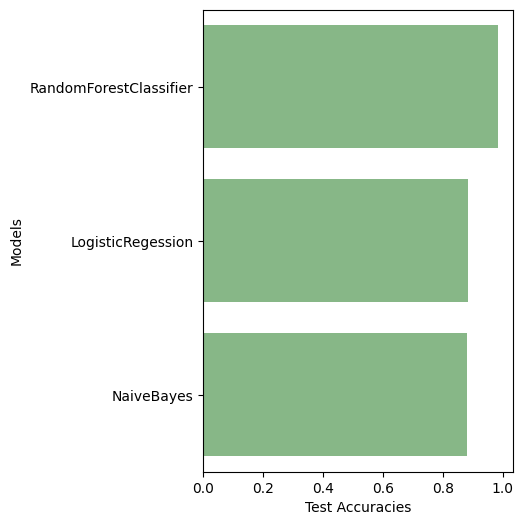

In [ ]:
model_list= list(model_performances['Model'].unique())
accuracy_list= list(model_performances['Accuracy'].sort_values(ascending=False))
f,ax = plt.subplots(figsize = (4,6))
sns.barplot(x=accuracy_list,y=model_list,color='green',alpha = 0.5)
ax.set(xlabel='Test Accuracies', ylabel='Models')
plt.show()